# <u>*Ridge Regression*<u>

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from IPython.display import Markdown # Import Markdown
from sklearn.metrics import r2_score


# DATA PROCESSING

In [2]:
df = pd.read_csv('AAPL.csv', delimiter=';')
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y', errors='coerce')
df.head()

,Date,PX_LAST,Returns,PX_OPEN,PX_HIGH,PX_LOW,VOLUME,VWAP,VIX,PX_ASK,...,VOLATILITY_90D,Mkt-RF,SMB,HML,RMW,CMA,RF,Price Earnings Ratio (P/E),BEst P/E Ratio,Price/Cash Flow
0,2010-01-04,7.643,0.000000,7.623,7.661,7.585,493728200,7.6314,20.04,7.655,...,25.459,1.69,0.79,1.12,-0.17,0.21,0.0,20.90,23.23,16.04
1,2010-01-05,7.656,0.001701,7.664,7.700,7.616,601904016,7.6657,19.35,7.656,...,25.408,0.31,-0.41,1.24,-0.19,0.19,0.0,20.94,23.27,16.06
2,2010-01-06,7.535,-0.015805,7.656,7.687,7.527,552158376,7.6068,19.16,7.534,...,25.607,0.13,-0.13,0.57,-0.05,0.20,0.0,20.60,22.42,15.81
3,2010-01-07,7.521,-0.001858,7.563,7.571,7.466,477078140,7.5124,19.06,7.519,...,25.515,0.40,0.25,0.98,-0.69,0.22,0.0,20.56,21.74,15.78
4,2010-01-08,7.571,0.006648,7.511,7.571,7.466,447876324,7.5324,18.13,7.571,...,25.289,0.33,0.32,0.01,0.22,-0.37,0.0,20.70,21.88,15.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3774 non-null   datetime64[ns]
 1   PX_LAST                     3774 non-null   float64       
 2   Returns                     3774 non-null   float64       
 3   PX_OPEN                     3774 non-null   float64       
 4   PX_HIGH                     3774 non-null   float64       
 5   PX_LOW                      3774 non-null   float64       
 6   VOLUME                      3774 non-null   int64         
 7   VWAP                        3774 non-null   float64       
 8   VIX                         3774 non-null   float64       
 9   PX_ASK                      3774 non-null   float64       
 10  PX_BID                      3774 non-null   float64       
 11  SPREAD                      3774 non-null   float64     

In [4]:
# Check for missing data
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date                          0
PX_LAST                       0
Returns                       0
PX_OPEN                       0
PX_HIGH                       0
PX_LOW                        0
VOLUME                        0
VWAP                          0
VIX                           0
PX_ASK                        0
PX_BID                        0
SPREAD                        0
HIST_CALL_IMP_VOL             0
VOLATILITY_30D                0
VOLATILITY_60D                0
VOLATILITY_90D                0
Mkt-RF                        0
SMB                           0
HML                           0
RMW                           0
CMA                           0
RF                            0
Price Earnings Ratio (P/E)    0
BEst P/E Ratio                0
Price/Cash Flow               0
dtype: int64


In [5]:
# drop date
df_features = df.drop(['Date'], axis=1)

# Define X and y
X = df_features.drop(columns=['Returns'])  # Features colums: All columns except 'Returns'
y = df_features['Returns']                 # Target column

# Convert to numpy arrays
# X = X.to_numpy()
# y = y.to_numpy()

In [6]:
np.random.seed(1)

# Step 1: Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=2)

# Step 2: Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=2)

In [7]:
# Check shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2641, 23)
y_train shape: (2641,)
X_val shape: (566, 23)
y_val shape: (566,)
X_test shape: (567, 23)
y_test shape: (567,)


In [9]:
# To scale we use StandardScaler() since it is commonly used in models that assume normally distributed inputs
# or perform linear operations,such as: MLR, Ridge and Lasso

# Apply Scaling
scaler_X = StandardScaler()

# Fit only on training data
X_train_scaled = scaler_X.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler_X.transform(X_val)

-----
## Ridge Regression Model Summary on Standardized Data ##
This model fit is used as a baseline benchmark, where all variables are included, even those that do not fully satisfy the model assumptions. The purpose is to establish a reference point against which subsequent models—refined by excluding problematic features—can be evaluated to assess improvements in performance and robustness.

In [12]:
# model = Ridge(alpha=λ)
ridge = Ridge()

In [13]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [14]:
# Set up a range of possible lambda values
param_grid = {
    'alpha' : [0.00001, 0.0001, 0.001, 0.002, 0.004, 0.005, 0.008, 0.1, 1.0, 10.0]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

ridge_cv = GridSearchCV(ridge, param_grid, cv=kf, n_jobs=-1)

ridge_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.002, 0.004, 0.005,
                                   0.008, 0.1, 1.0, 10.0]})

*Comment:* The optimal regularization parameter selected via cross-validation is $\lambda = 0.008$,
which indicates only mild shrinkage of the coefficients. Such a low value of $\lambda$
implies that the penalty term has little influence on the estimation process, and the Ridge
model therefore behaves very similarly to ordinary least squares (OLS), providing only minimal regularization.

In [15]:
# Get the best model
ridge_optimal = ridge_cv.best_estimator_

In [16]:
# Define model info function
def ridge_model_info(model, X, y):
    n, k = X.shape
    y_pred = model.predict(X)
    residuals = y - y_pred
    SSR = np.sum((y_pred - np.mean(y))**2)
    RSS = np.sum((y - y_pred)**2)
    TSS = SSR + RSS
    R2 = SSR / TSS
    R2_adj = 1 - (1 - R2) * (n - 1) / (n - k - 1)

    mse = RSS / (n - k)
    log_likelihood = -0.5 * n * (np.log(2 * np.pi) + np.log(mse) + 1)
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n) * k

    dw = np.sum(np.diff(residuals)**2) / RSS

    skew = stats.skew(residuals)
    kurt = stats.kurtosis(residuals, fisher=False)
    jb_stat = n / 6 * (skew**2 + 0.25 * (kurt - 3)**2)
    jb_p = 1 - stats.chi2.cdf(jb_stat, df=2)

    X_design = np.hstack([np.ones((n, 1)), X]) if model.fit_intercept else X
    cond_no = np.linalg.cond(X_design)

    return {
        '============GENERAL SUMMARY OF MODEL ============': '',
        'R-squared': R2,
        'Adjusted R-squared': R2_adj,
        'Log-Likelihood': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'Durbin-Watson': dw,
        'Skew': skew,
        'Kurtosis': kurt,
        'Jarque-Bera': jb_stat,
        'Prob(JB)': jb_p,
        'Condition Number': cond_no,
        '============END OF GENERAL SUMMARY ============': ''
    }


In [17]:
# Display summary
info = ridge_model_info(ridge_optimal, X_train_scaled, y_train)

for k, v in info.items():
    if isinstance(v, str):
        print(k)
    else:
        print(f"{k}: {v:.4f}")

============GENERAL SUMMARY OF MODEL ============
R-squared: 0.6184
Adjusted R-squared: 0.6150
Log-Likelihood: 8180.1153
AIC: -16314.2307
BIC: -16179.0157
Durbin-Watson: 2.0190
Skew: -0.3390
Kurtosis: 13.9661
Jarque-Bera: 13283.7705
Prob(JB): 0.0000
Condition Number: 26871339731831580.0000
============END OF GENERAL SUMMARY ============


*Comment:* Multicollinearity is a serious issue (very high condition number).

In [18]:
# Coefficient summary function
def ridge_summary(model, X, y, feature_names=None):
    n, k = X.shape
    y_pred = model.predict(X)
    residuals = y - y_pred
    RSS = np.sum(residuals ** 2)
    MSE = RSS / (n - k)

    # Add intercept to X if needed
    if model.fit_intercept:
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        coef = np.concatenate([[model.intercept_], model.coef_])
        k += 1
    else:
        coef = model.coef_

    # Ridge-specific alpha
    alpha = model.alpha_ if hasattr(model, 'alpha_') else model.alpha

    # Variance-covariance matrix with ridge penalty
    XTX_inv = np.linalg.inv(X.T @ X + alpha * np.identity(k))
    var_beta = MSE * XTX_inv
    std_err = np.sqrt(np.diag(var_beta))

    # t-stats and p-values
    t_stats = coef / std_err
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n - k))

    # Feature names
    if feature_names is None:
        feature_names = [f'x{i+1}' for i in range(k)]
    if model.fit_intercept:
        feature_names = ['const'] + feature_names

    summary = pd.DataFrame({
        'coef': coef,
        'std err': std_err,
        't': t_stats,
        'P>|t|': p_values,
    }, index=feature_names)

    return summary


In [19]:
# Generate and display the summary
summary_df = ridge_summary(ridge_optimal, X_train_scaled, y_train, feature_names=X_train.columns.tolist())
print(summary_df)

                                coef   std err          t         P>|t|
const                       0.001067  0.000213   5.016033  5.628078e-07
PX_LAST                     0.085900  0.093929   0.914523  3.605263e-01
PX_OPEN                    -0.322729  0.024321 -13.269443  0.000000e+00
PX_HIGH                     0.101485  0.037836   2.682249  7.358867e-03
PX_LOW                      0.023211  0.036121   0.642599  5.205408e-01
VOLUME                     -0.000136  0.000289  -0.472089  6.369024e-01
VWAP                        0.001326  0.063743   0.020796  9.834100e-01
VIX                         0.000430  0.000377   1.139592  2.545605e-01
PX_ASK                      0.054147  0.098354   0.550529  5.820036e-01
PX_BID                      0.054155  0.098346   0.550659  5.819144e-01
SPREAD                     -0.000005  0.000263  -0.019835  9.841766e-01
HIST_CALL_IMP_VOL          -0.002132  0.000404  -5.283244  1.373674e-07
VOLATILITY_30D              0.000811  0.000413   1.962176  4.984

*Comment:* Not significant (p > 0.1) - PX_LAST, PX_LOW, VOLUME, VWAP, VIX, PX_ASK, PX_BID, SPREAD, VOLATILITY_60D,  
VOLATILITY_90D, RF, P/E ratio, Price/Cash Flow. Their coefficients should be interpreted cautiously as they don’t provide strong evidence of explanatory power.

-----
## Baseline Prediction ##
In this section, we establish a baseline on the validation set. The objective is to benchmark the model’s predictive performance prior to addressing assumption violations, providing a reference point to evaluate improvements achieved through subsequent model refinement.

In [20]:
y_pred = ridge_cv.predict(X_val_scaled)

In [21]:
best_alpha = ridge_cv.best_estimator_.alpha
print(f"Alpha used by best Ridge model: {best_alpha}")


Alpha used by best Ridge model: 0.008


In [22]:
# --- Directional Accuracy ---
def directional_accuracy(y_true, y_pred):
    # Shift actual and predicted values to compute the direction
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the direction of actual and predicted change
    actual_direction = np.sign(y_true[1:] - y_true[:-1])
    predicted_direction = np.sign(y_pred[1:] - y_pred[:-1])

    # Compute directional accuracy
    return np.mean(actual_direction == predicted_direction)

# Evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
mad = median_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
direction_acc = directional_accuracy(y_val, y_pred)

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Median Absolute Deviation (MAD): {mad:.6f}")
print(f"R-squared: {r2:.6f}")
print(f"Directional Accuracy: {direction_acc:.6f}")

Mean Squared Error (MSE): 0.000145
Root Mean Squared Error (RMSE): 0.012028
Mean Absolute Error (MAE): 0.008019
Median Absolute Deviation (MAD): 0.005611
R-squared: 0.532838
Directional Accuracy: 0.768142


-----
## Handling Multicollinearity ##
To address multicollinearity, we will identify highly correlated features ($r > 0.9$)
and remove them from the model.


### Correlation matrix ###

In [23]:
print(X_train.shape)
print(X_train_scaled.shape)
print(y_train.shape)

(2641, 23)
(2641, 23)
(2641,)


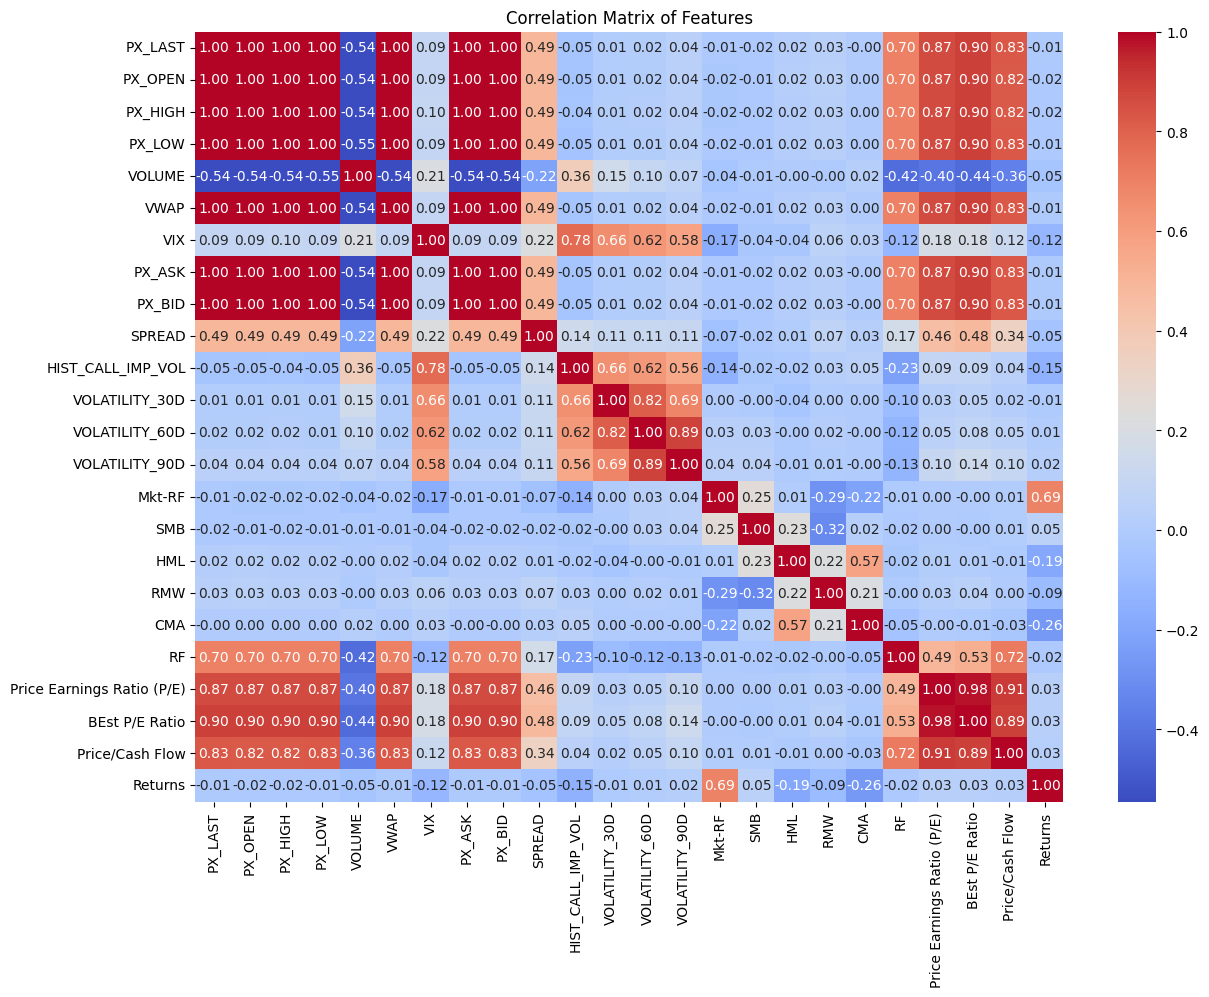

In [24]:
# Combine features and target into one DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [25]:
# Unstack the correlation matrix
stacked_corr = corr_matrix.unstack()

# Remove self-correlations
filtered_corr = stacked_corr[stacked_corr != 1]

# Keep only pairs with correlation above 0.9
high_corr = filtered_corr[filtered_corr > 0.9]

# Drop duplicate pairs (e.g., (A, B) and (B, A))
high_corr = high_corr[~high_corr.index.duplicated(keep='first')]

# Display the result
print("Highly Correlated Feature Pairs (correlation > 0.9):")
print(high_corr)


Highly Correlated Feature Pairs (correlation > 0.9):
PX_LAST                     PX_OPEN                       0.999815
                            PX_HIGH                       0.999905
                            PX_LOW                        0.999917
                            VWAP                          0.999966
                            PX_ASK                        1.000000
                            PX_BID                        1.000000
PX_OPEN                     PX_LAST                       0.999815
                            PX_HIGH                       0.999920
                            PX_LOW                        0.999907
                            VWAP                          0.999905
                            PX_ASK                        0.999815
                            PX_BID                        0.999814
PX_HIGH                     PX_LAST                       0.999905
                            PX_OPEN                       0.999920
         

In [26]:
def get_highly_correlated_features(df, threshold=0.9):
    # Compute absolute correlation matrix
    corr_matrix = df.corr().abs()

    # Keep upper triangle of the matrix (excluding self-correlations)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identify features to consider for removal
    features_to_remove = set()
    for column in upper.columns:
        high_corr_features = upper.index[upper[column] > threshold].tolist()
        if high_corr_features:
            features_to_remove.add(column)

    return sorted(features_to_remove)

# Example usage:
features_to_remove = get_highly_correlated_features(X_train, threshold=0.9)

print("Features to consider removing due to high correlation:")
print(features_to_remove)

Features to consider removing due to high correlation:
['BEst P/E Ratio', 'PX_ASK', 'PX_BID', 'PX_HIGH', 'PX_LOW', 'PX_OPEN', 'Price/Cash Flow', 'VWAP']


In [27]:
features_to_remove = [
    "BEst P/E Ratio",
    "PX_ASK",
    "PX_BID",
    "PX_HIGH",
    "PX_LOW",
    "PX_OPEN",
    "Price/Cash Flow",
    "VWAP"
]

X_train = X_train.drop(columns=features_to_remove)

-----
## Ridge Regression Model — After Removing Features Violating Assumptions  ##

In [28]:
# Check shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2641, 15)
y_train shape: (2641,)
X_val shape: (566, 23)
y_val shape: (566,)
X_test shape: (567, 23)
y_test shape: (567,)


In [29]:
features_to_remove = [
    "BEst P/E Ratio",
    "PX_ASK",
    "PX_BID",
    "PX_HIGH",
    "PX_LOW",
    "PX_OPEN",
    "Price/Cash Flow",
    "VWAP"
]
X_val = X_val.drop(columns=features_to_remove)
X_test = X_test.drop(columns=features_to_remove)

In [30]:
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_val shape: (566, 15)
X_test shape: (567, 15)


In [31]:
# Apply Scaling
scaler_X = StandardScaler()

# Fit only on training data
X_train_scaled = scaler_X.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler_X.transform(X_val)

In [32]:
X_train_scaled.shape
X_val_scaled.shape

(566, 15)

In [33]:
# Set up a range of possible lambda values
param_grid = {
    'alpha' : [0.00001, 0.0001, 0.001, 0.002, 0.004, 0.005, 0.008, 0.1, 1.0, 10.0, 30, 50]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

ridge_cv = GridSearchCV(ridge, param_grid, cv=kf, n_jobs=-1)

ridge_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.002, 0.004, 0.005,
                                   0.008, 0.1, 1.0, 10.0, 30, 50]})

*Comment:* The regularization parameter was selected at $\lambda = 30$ (denoted as *alpha* in the implementation). This implies that the coefficients were strongly shrunk, which helped reduce variance and mitigate overfitting,  
albeit at the expense of introducing additional bias.

In [34]:
# Get the best model
ridge_optimal = ridge_cv.best_estimator_

In [35]:
# Display summary
info = ridge_model_info(ridge_optimal, X_train_scaled, y_train)

for k, v in info.items():
    if isinstance(v, str):
        print(k)
    else:
        print(f"{k}: {v:.4f}")

# Generate and display the summary
summary_df = ridge_summary(ridge_optimal, X_train_scaled, y_train, feature_names=X_train.columns.tolist())
print(summary_df)

============GENERAL SUMMARY OF MODEL ============
R-squared: 0.5483
Adjusted R-squared: 0.5457
Log-Likelihood: 7977.6192
AIC: -15925.2384
BIC: -15837.0547
Durbin-Watson: 1.9649
Skew: -0.2025
Kurtosis: 10.9371
Jarque-Bera: 6950.4159
Prob(JB): 0.0000
Condition Number: 7.2219
============END OF GENERAL SUMMARY ============
                                coef   std err          t         P>|t|
const                       0.001067  0.000228   4.672113  3.131512e-06
PX_LAST                    -0.001495  0.000629  -2.375681  1.758799e-02
VOLUME                      0.000036  0.000300   0.118667  9.055483e-01
VIX                         0.000740  0.000394   1.877668  6.053738e-02
SPREAD                     -0.000279  0.000275  -1.013586  3.108738e-01
HIST_CALL_IMP_VOL          -0.002198  0.000410  -5.357032  9.194249e-08
VOLATILITY_30D              0.000601  0.000427   1.405843  1.598891e-01
VOLATILITY_60D             -0.000454  0.000609  -0.745397  4.560983e-01
VOLATILITY_90D              0.

*Comment:* The condition number has dropped to 7.22, indicating that the issue of multicollinearity present in the previous specification has been resolved. This suggests the model is now numerically stable and the coefficients are more reliable for interpretation.

-----
## Prediction on Validation Set ##

In [36]:
y_pred = ridge_cv.predict(X_val_scaled)

In [37]:
best_alpha = ridge_cv.best_estimator_.alpha
print(f"Alpha used by best Ridge model: {best_alpha}")

Alpha used by best Ridge model: 30


In [38]:
# Evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
mad = median_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
direction_acc = directional_accuracy(y_val, y_pred)

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Median Absolute Deviation (MAD): {mad:.6f}")
print(f"R-squared: {r2:.6f}")
print(f"Directional Accuracy: {direction_acc:.6f}")

Mean Squared Error (MSE): 0.000168
Root Mean Squared Error (RMSE): 0.012977
Mean Absolute Error (MAE): 0.008844
Median Absolute Deviation (MAD): 0.006091
R-squared: 0.456239
Directional Accuracy: 0.745133


-----
## Prediction on Out-of-Sample Data ##

In [39]:
# Concatenate X_train and X_val
X_train_new = np.concatenate((X_train, X_val), axis=0)

# If you also want to combine the corresponding y values:
y_train_new = np.concatenate((y_train, y_val), axis=0)

In [40]:
print("X_train_new shape:", X_train_new.shape)
print("y_train_new shape:", y_train_new.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_new shape: (3207, 15)
y_train_new shape: (3207,)
X_test shape: (567, 15)
y_test shape: (567,)


In [42]:
# Apply Scaling
scaler_X = StandardScaler()

# Fit only on training data
X_train_new_scaled = scaler_X.fit_transform(X_train_new)

# Transform validation and test sets
X_test_scaled = scaler_X.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [45]:
# Set up a range of possible lambda values
param_grid = {
    'alpha' : [0.00001, 0.0001, 0.001, 0.002, 0.004, 0.005, 0.008, 0.1, 1.0, 10.0, 25, 30, 35, 40, 50, 60, 100]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

ridge_cv = GridSearchCV(ridge, param_grid, cv=kf, n_jobs=-1)

ridge_cv.fit(X_train_new_scaled, y_train_new)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.002, 0.004, 0.005,
                                   0.008, 0.1, 1.0, 10.0, 25, 30, 35, 40, 50,
                                   60, 100]})

*comment:* A lambda (alpha) value of 30 implies a strong shrinkage of the coefficients, which reduces variance and mitigates overfitting, albeit at the cost of introducing additional bias.

In [46]:
# Display summary
info = ridge_model_info(ridge_optimal, X_train_scaled, y_train)

for k, v in info.items():
    if isinstance(v, str):
        print(k)
    else:
        print(f"{k}: {v:.4f}")

# Generate and display the summary
summary_df = ridge_summary(ridge_optimal, X_train_new_scaled, y_train_new, feature_names=X_train.columns.tolist())
print(summary_df)

============GENERAL SUMMARY OF MODEL ============
R-squared: 0.5483
Adjusted R-squared: 0.5457
Log-Likelihood: 7977.6192
AIC: -15925.2384
BIC: -15837.0547
Durbin-Watson: 1.9649
Skew: -0.2025
Kurtosis: 10.9371
Jarque-Bera: 6950.4159
Prob(JB): 0.0000
Condition Number: 7.2219
============END OF GENERAL SUMMARY ============
                                coef   std err          t         P>|t|
const                       0.001067  0.000211   5.051239  4.636131e-07
PX_LAST                    -0.001495  0.000584  -2.559912  1.051555e-02
VOLUME                      0.000036  0.000277   0.128296  8.979231e-01
VIX                         0.000740  0.000364   2.036349  4.179771e-02
SPREAD                     -0.000279  0.000252  -1.104783  2.693367e-01
HIST_CALL_IMP_VOL          -0.002198  0.000377  -5.836055  5.880697e-09
VOLATILITY_30D              0.000601  0.000398   1.510053  1.311290e-01
VOLATILITY_60D             -0.000454  0.000564  -0.804969  4.208976e-01
VOLATILITY_90D              0.

In [47]:
y_pred = ridge_cv.predict(X_test_scaled)

In [48]:
best_alpha = ridge_cv.best_estimator_.alpha
print(f"Alpha used by best Ridge model: {best_alpha}")


Alpha used by best Ridge model: 35


In [49]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
direction_acc = directional_accuracy(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Median Absolute Deviation (MAD): {mad:.6f}")
print(f"R-squared: {r2:.6f}")
print(f"Directional Accuracy: {direction_acc:.6f}")

Mean Squared Error (MSE): 0.000141
Root Mean Squared Error (RMSE): 0.011895
Mean Absolute Error (MAE): 0.008507
Median Absolute Deviation (MAD): 0.006312
R-squared: 0.517807
Directional Accuracy: 0.731449
